# Estimador parametros sistema primer orden

Para el sistema de primer orden: 

$ x(k+1) = a x(k) + b u(k) + c$


con $a,b,c$ parámetros

Se quiere estimar los parámetros conocidos las secuencias x, u

In [179]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Generamos secuencias con parametros conocidos

In [212]:
a = 0.95
b = 0.2
c = .1
N = 400
Ts = 0.1
x = np.zeros([N, 1], dtype=float)
u = x.copy()


def get_u(k):
    u=0
    if k<50:
        u = 1
    elif k<80:
        u=-1
    elif k<200:
        u=0.5         
    elif k<300:
        u=-0.5      
        
    return u

# simulation
x[0] = 0
for k in range(0,N-1):
    # print(k)
    u[k] = get_u(k)
    x[k+1] = a*x[k] + b* u[k] + c
# ruido    
for k in range(0,N-1):
    x[k] = x[k] + np.random.randn()*.100


Text(0, 0.5, 'x')

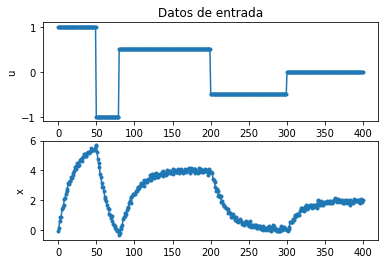

In [213]:
plt.figure()
plt.subplot(2,1,1)
plt.title('Datos de entrada')
plt.plot(u,'.-')
plt.ylabel('u')
plt.subplot(2,1,2)
plt.plot(x,'.-')
plt.ylabel('x')

## Estimacion de parametros

### funcion Minimizar de scipy

In [214]:
from scipy.optimize import leastsq

In [215]:
x0 = (0, 0, 0)

def g(s, y, u):
    o = np.zeros([N-1, 1])
    a = s[0]
    b = s[1]
    c = s[2]
    for k in range(0,N-1):
        o[k] = a*y[k] + b*u[k] + c - y[k+1]
        
    return o[:,0];

def dg(s, y, u):
    s_jab = np.zeros([N-1, 3])
    a = s[0]
    b = s[1]
    c = s[2]
    # error
    e = a*y[0:N-1] + b * a*u[0:N-1] + c - y[1:N] 
    for k in range(0,N-1):
        s_jab[k][0] = y[k]
        s_jab[k][1] = u[k]
        s_jab[k][2] = 1
    return s_jab

beta_opt, beta_cov = leastsq(func=g, x0=x0, args=(x,u), Dfun=dg)

In [216]:
# salida de funcion
beta_opt

array([0.942616  , 0.21272464, 0.1157957 ])

## Se calcula la funcion de error

Text(0, 0.5, 'Error')

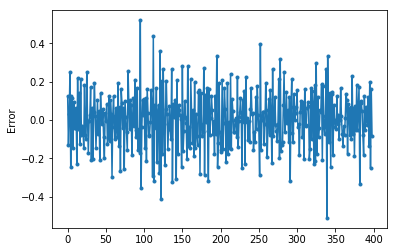

In [217]:
a = beta_opt[0]
b = beta_opt[1]
c = beta_opt[2]
e = a*x[:-1] + b*u[:-1] + c  - x[1:]
plt.figure
plt.plot(e,'.-')
plt.ylabel('Error')

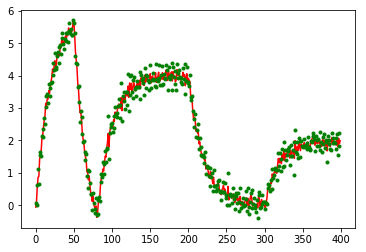

In [218]:
plt.figure
plt.plot(x,'r-')
plt.plot(x[:-1]+e,'.g')

In [219]:
# Filtramos los datos


In [188]:
x_filt = x.copy()
u_filt = x.copy()
for k in range(0,N-3):
#    print(k)
    x_filt[k] = (x[k]+x[k+1]+x[k+2])/2
    u_filt[k] = (u[k]+u[k+1]+u[k+2])/2
beta_opt, beta_cov = leastsq(func=g, x0=x0, args=(x_filt,u_filt), Dfun=dg)

In [189]:
beta_opt

array([0.9918951 , 0.13479274, 0.11385757])